In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from timeit import default_timer as timer
import math
from decimal import Decimal

<h2>Helper functions:</h2>


In [2]:
#The wrapper time accepts callback functions with arguments (in tuple), performs callback and measures the time of execution.
#It returns tuple of callback result and time of callback execution.
def time(func,*args):
    start=timer()

    res=func(*args)

    end=timer()
    return (str(res),end-start)

In [3]:
#Const function
#lambda *args:math.e

#Sum of elements
def sum(*args):
    res=0
    for a in args[0]:
        res+=a
    
    return res

#Product of elements
def mul(*args):
    res=1
    for a in args[0]:
        res*=a
    
    return res

In [4]:
#A polynomial function with direct calculation
#args[0] is a vector, args[1] is x
def poly(*args):
    v=args[0]
    x=Decimal(args[1])

    res=Decimal(0)
    i=0
    while i<len(v):
        res+=Decimal(v[i])*(x**i)
        i+=1

    return res
#A polynomial function using Horner’s method
#args[0] is a vector, args[1] is x
def polyHorner(*args):
    v=args[0]
    x=Decimal(args[1])

    res=Decimal(0)
    i=len(v)-1
    while i>=0:
        res+=x*(Decimal(v[i])+res)
        i-=1
    
    return res

Note that every used sort function (bubbleSort,sorted and np.sort) returns sorted COPY of vector's elements

In [5]:
#Bubble sort
def bubbleSort(*args):
    toSort=args[0].copy()
    for i in range(len(toSort)-1):
        for j in range(len(toSort)-i-1):
            if toSort[j] > toSort[j + 1] :
                t=toSort[j]
                toSort[j]=toSort[j + 1]
                toSort[j+1]=t

    return toSort

#Quicksort
#lambda *args: np.sort(args[0])

#Timsort
#lambda *args: sorted(args[0])

In [6]:
#quicksort from https://stackoverflow.com/a/18262384
def qsort(*args):
    array=args[0]

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        # New array
        return qsort(less)+equal+qsort(greater)

    else:
        return array

In [7]:
#mulMatrix generate two random matrices n*n and find their product
def mulMatrix(*args):
    n=args[0]
    X=np.random.uniform(0,1,(n,n))
    Y=np.random.uniform(0,1,(n,n))

    res=[[0]*n]*n

    for i in range(n):
        for j in range(n):
            for k in range(n):
                res[i][j] += X[i][k] * Y[k][j]

    return res

Final dataframe will include the next features:
* n - number from 1 to 2000
* name - name of operation to investigate
* inp - input arguments for debug
* res - result of operation for debug
* time_measured - execution time of operation in seconds
* time_predicted - theoretical time of operation in number of operation (units)

In [8]:
#if you already have computed csv, turn "useCsv" flag to True value and just skip code below in this cell
useCsv=True

if(not useCsv):
    #every data instance (a single measurment of execution time) will be added as a dictionary with
    #features listed above to list temp_data
    temp_data=[]

    #If the time of the last execution of the operation is more than 10 seconds, the next executions will be skipped
    #It will be expected they take more than 10 seconds to complete, so we just mark their time as infinite.
    toSkip={"pd":False,"bs":False,"qs":False,"ts":False,"mp":False}
    max_time=10

    for n in range(1,2001):
        #repeat 5 times for each n with different random vectors
        for i in range(5):
            vector=np.random.uniform(0,1,n)
            inp=str(vector)


            #Const
            res_time=time(lambda *args:math.e,vector)
            temp_data.append({"n":n,"name":"constant function","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":1})
            
            #Additon
            res_time=time(sum,vector)
            temp_data.append({"n":n,"name":"the sum of elements","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n})

            #Multiplication
            res_time=time(mul,vector)
            temp_data.append({"n":n,"name":"the product of elements","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n})

            #Poly Direct
            if(not toSkip["pd"]):
                res_time=time(poly,vector,1.5)
                temp_data.append({"n":n,"name":"poly direct","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n*n})
                if(res_time[1]>max_time):
                    toSkip["pd"]=True
            else:
                temp_data.append({"n":n,"name":"poly direct","inp":inp,"res":"skipped","time_measured":np.Inf,"time_predicted":n*n})

            #Poly Horner
            res_time=time(polyHorner,vector,1.5)
            temp_data.append({"n":n,"name":"poly horner","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n})

            #Bubble sort
            if(not toSkip["bs"]):
                res_time=time(bubbleSort,vector)
                temp_data.append({"n":n,"name":"bubble sort","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n*n})
                if(res_time[1]>max_time):
                    toSkip["bs"]=True
            else:
                temp_data.append({"n":n,"name":"bubble sort","inp":inp,"res":"skipped","time_measured":np.Inf,"time_predicted":n*n})
            
            #Quick sort
            if(not toSkip["qs"]):
                res_time=time(qsort,vector)
                temp_data.append({"n":n,"name":"quick sort","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n*math.log(n)})
                if(res_time[1]>max_time):
                    toSkip["qs"]=True
            else:
                temp_data.append({"n":n,"name":"quick sort","inp":inp,"res":"skipped","time_measured":np.Inf,"time_predicted":n*math.log(n)})

            #Timsort
            if(not toSkip["ts"]):
                res_time=time(lambda *args: sorted(args[0]),vector)
                temp_data.append({"n":n,"name":"timsort","inp":inp,"res":res_time[0],"time_measured":res_time[1],"time_predicted":n*math.log(n)})
                if(res_time[1]>max_time):
                    toSkip["ts"]=True
            else:
                temp_data.append({"n":n,"name":"timsort","inp":inp,"res":"skipped","time_measured":np.Inf,"time_predicted":n*math.log(n)})

            #Matrix product
            if(not toSkip["mp"]):
                res_time=time(mulMatrix,n)
                temp_data.append({"n":n,"name":"matrix product","inp":str(n),"res":res_time[0],"time_measured":res_time[1],"time_predicted":n*n*n})
                if(res_time[1]>max_time):
                    toSkip["mp"]=True
            else:
                temp_data.append({"n":n,"name":"matrix product","inp":str(n),"res":"skipped","time_measured":np.Inf,"time_predicted":n*n*n})


In [10]:
df_final=pd.DataFrame()

if(useCsv):
    #write path to csv file instead of "df_final"
    df_final=pd.read_csv("df_final.csv",index_col=0)
else:
    #Convert the list of dictionaries to dataframe:
    df_final = pd.DataFrame.from_dict(temp_data)

df_final.tail(20)

,n,name,inp,res,time_measured,time_predicted
89980,2000,timsort,[0.59838747 0.2869329 0.9008738 ... 0.329537...,"[0.00014374761899682564, 0.0002435193302547933...",0.000463,1.520180e+04
89981,2000,matrix product,2000,skipped,inf,8.000000e+09
89982,2000,constant function,[0.49245745 0.40603771 0.27518435 ... 0.658132...,2.718281828459045,0.000001,1.000000e+00
89983,2000,the sum of elements,[0.49245745 0.40603771 0.27518435 ... 0.658132...,1005.7820709135327,0.000182,2.000000e+03
89984,2000,the product of elements,[0.49245745 0.40603771 0.27518435 ... 0.658132...,0.0,0.000198,2.000000e+03
89985,2000,poly direct,[0.49245745 0.40603771 0.27518435 ... 0.658132...,1.036315905930755955587833669E+352,0.005243,4.000000e+06
89986,2000,poly horner,[0.49245745 0.40603771 0.27518435 ... 0.658132...,1.894835886129414307253144110E+795,0.002917,2.000000e+03
89987,2000,bubble sort,[0.49245745 0.40603771 0.27518435 ... 0.658132...,[2.30735686e-04 1.10441245e-03 1.61205331e-03 ...,0.750417,4.000000e+06
89988,2000,quick sort,[0.49245745 0.40603771 0.27518435 ... 0.658132...,"[0.00023073568637554942, 0.0011044124477913586...",0.004154,1.520180e+04
89989,2000,timsort,[0.49245745 0.40603771 0.27518435 ... 0.658132...,"[0.00023073568637554942, 0.0011044124477913586...",0.000464,1.520180e+04


In [11]:
#find average for every combination of n number and operation name:
procesed=df_final.groupby(["n","name"],axis=0).aggregate({"time_measured":np.mean,"time_predicted":np.mean}).reset_index()
procesed.tail(20)

,n,name,time_measured,time_predicted
17980,1998,the sum of elements,0.000226,1.998000e+03
17981,1998,timsort,0.000470,1.518460e+04
17982,1999,bubble sort,0.860209,3.996001e+06
17983,1999,constant function,0.000001,1.000000e+00
17984,1999,matrix product,inf,7.988006e+09
17985,1999,poly direct,0.004950,3.996001e+06
17986,1999,poly horner,0.002997,1.999000e+03
17987,1999,quick sort,0.005002,1.519320e+04
17988,1999,the product of elements,0.000198,1.999000e+03
17989,1999,the sum of elements,0.000207,1.999000e+03


In [12]:
#Get new dataframe w/o infinite values
procesed_no_inf=procesed[procesed.time_measured != np.Inf]
#for debug
#procesed_no_inf[procesed_no_inf.name=="matrix product"].time_measured
#procesed_no_inf[procesed_no_inf.n==241]

In [13]:
df_final[(df_final.n==250) & (df_final.name=="matrix product")]

,n,name,inp,res,time_measured,time_predicted
11213,250,matrix product,250,skipped,inf,15625000.0
11222,250,matrix product,250,skipped,inf,15625000.0
11231,250,matrix product,250,skipped,inf,15625000.0
11240,250,matrix product,250,skipped,inf,15625000.0
11249,250,matrix product,250,skipped,inf,15625000.0


As you see our data differ by an orders of magnitude. So we could use log of time to compare it:

<AxesSubplot:xlabel='n', ylabel='time_measured'>

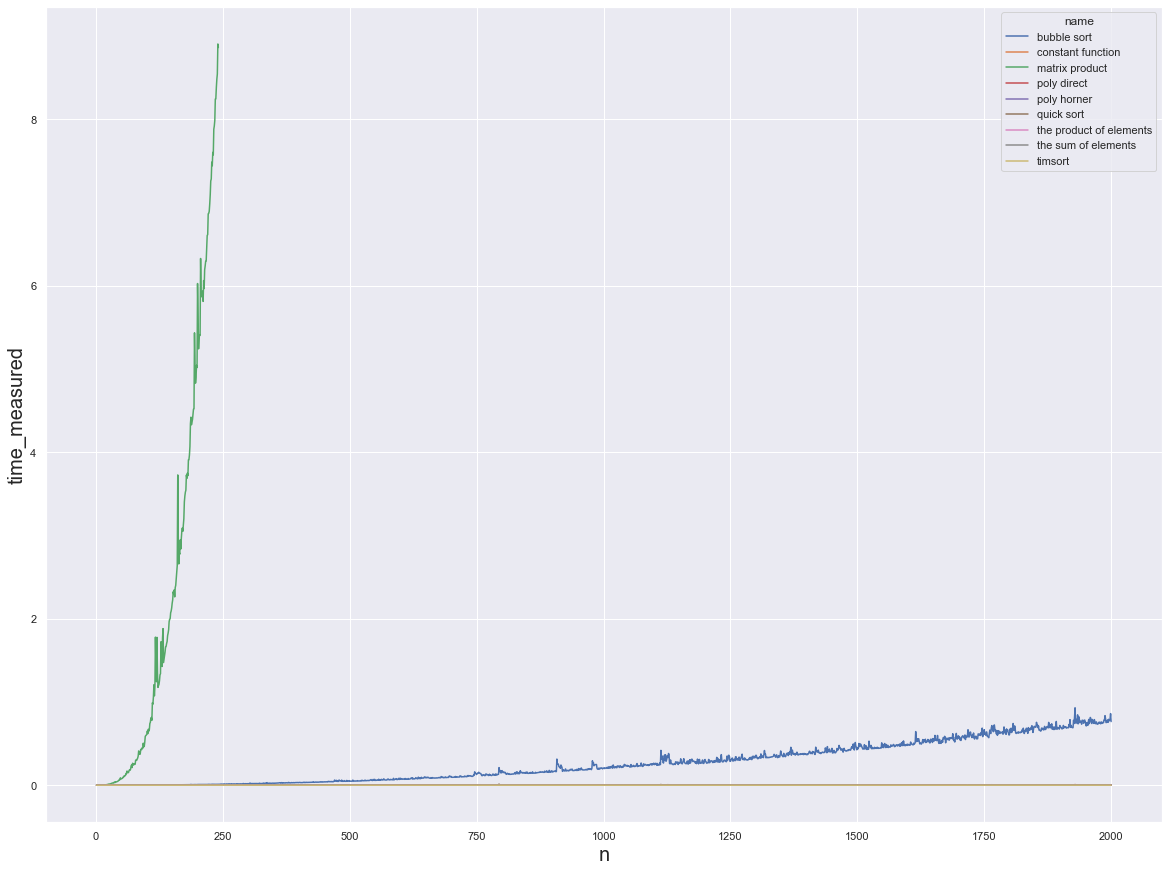

In [14]:
sns.lineplot(x="n",y="time_measured",hue="name",data=procesed_no_inf)

<AxesSubplot:xlabel='n', ylabel='time_measured'>

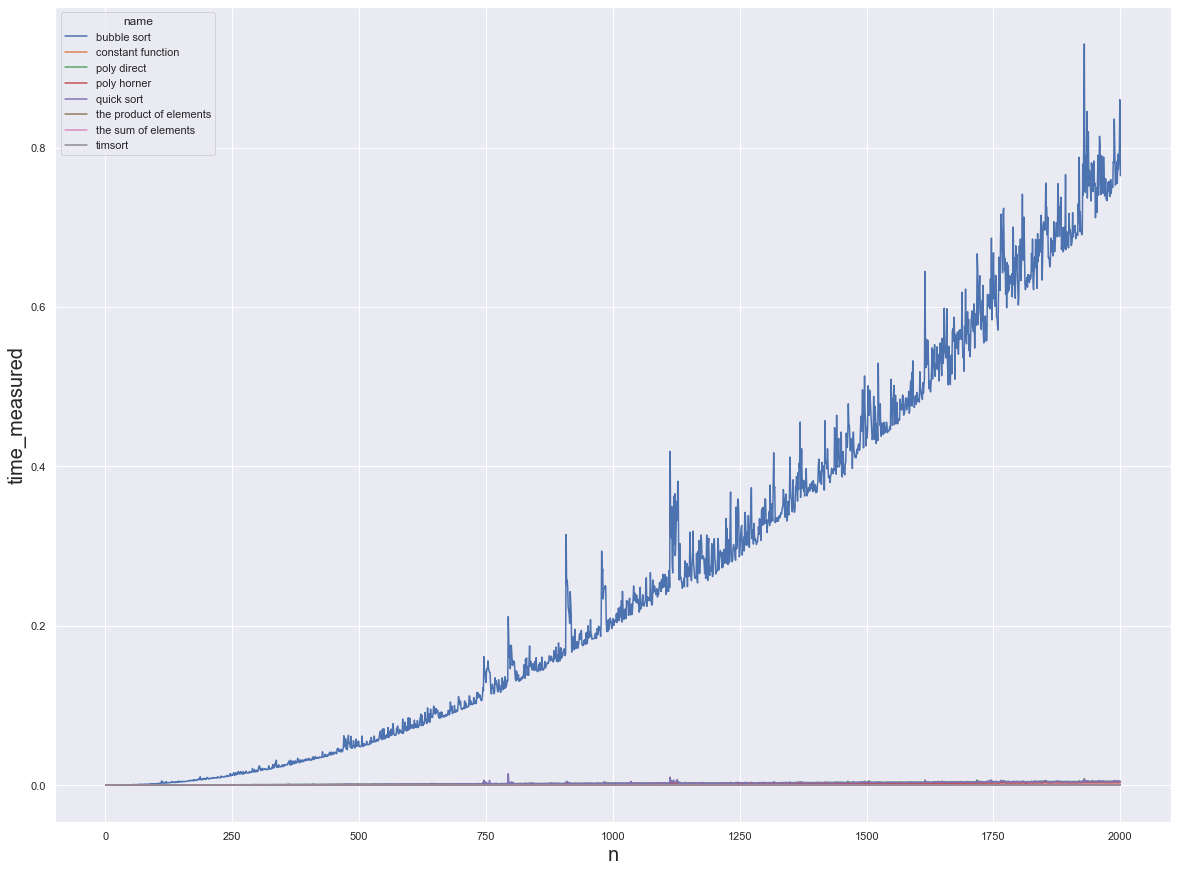

In [15]:
sns.lineplot(x="n",y="time_measured",hue="name",data=procesed_no_inf[procesed_no_inf.name!="matrix product"])

<AxesSubplot:xlabel='n', ylabel='time_measured'>

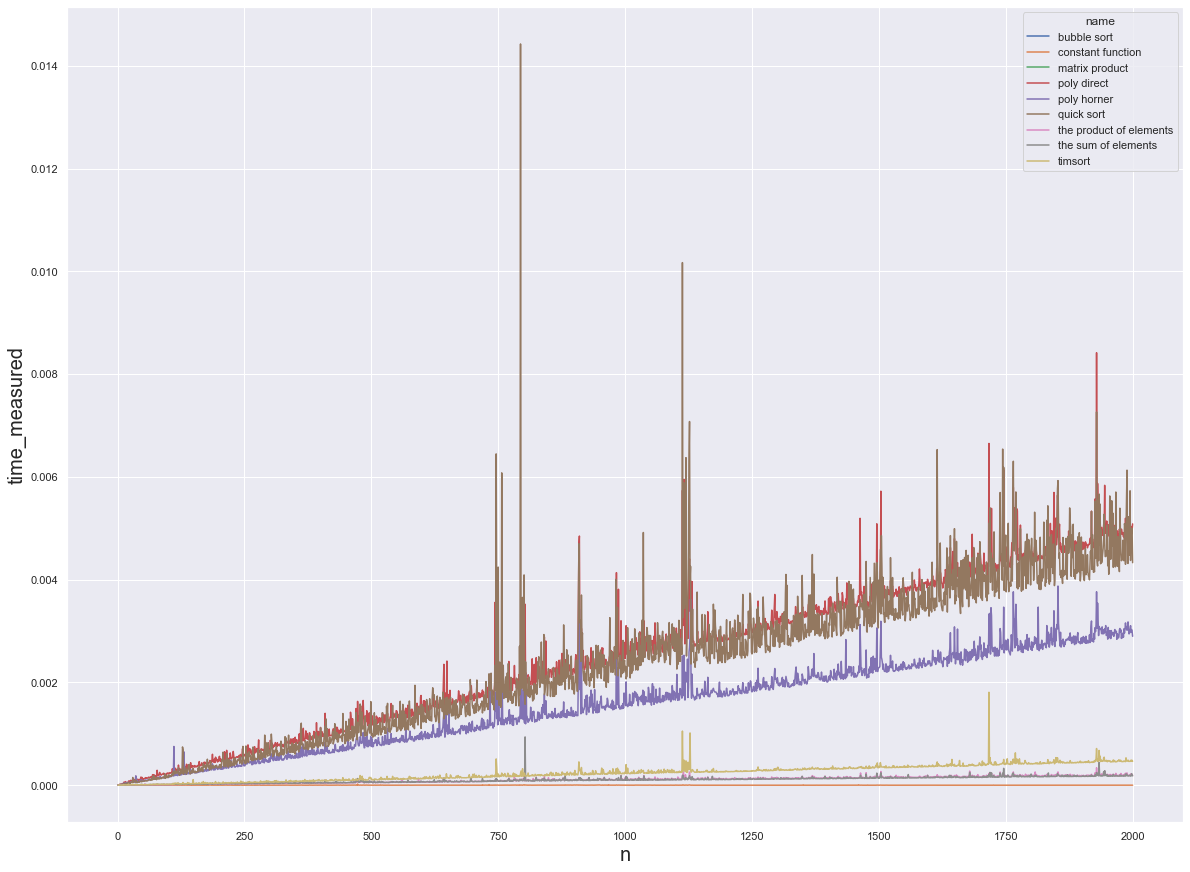

In [23]:
sns.lineplot(x="n",y="time_measured",hue="name",data=procesed_no_inf[
    (procesed_no_inf.name!="matrix product")&(procesed_no_inf.name!="bubble sort")|(((procesed_no_inf.name=="matrix product")|(procesed_no_inf.name=="bubble sort"))&(procesed_no_inf.n==1))
    ])

<AxesSubplot:xlabel='n', ylabel='time_measured'>

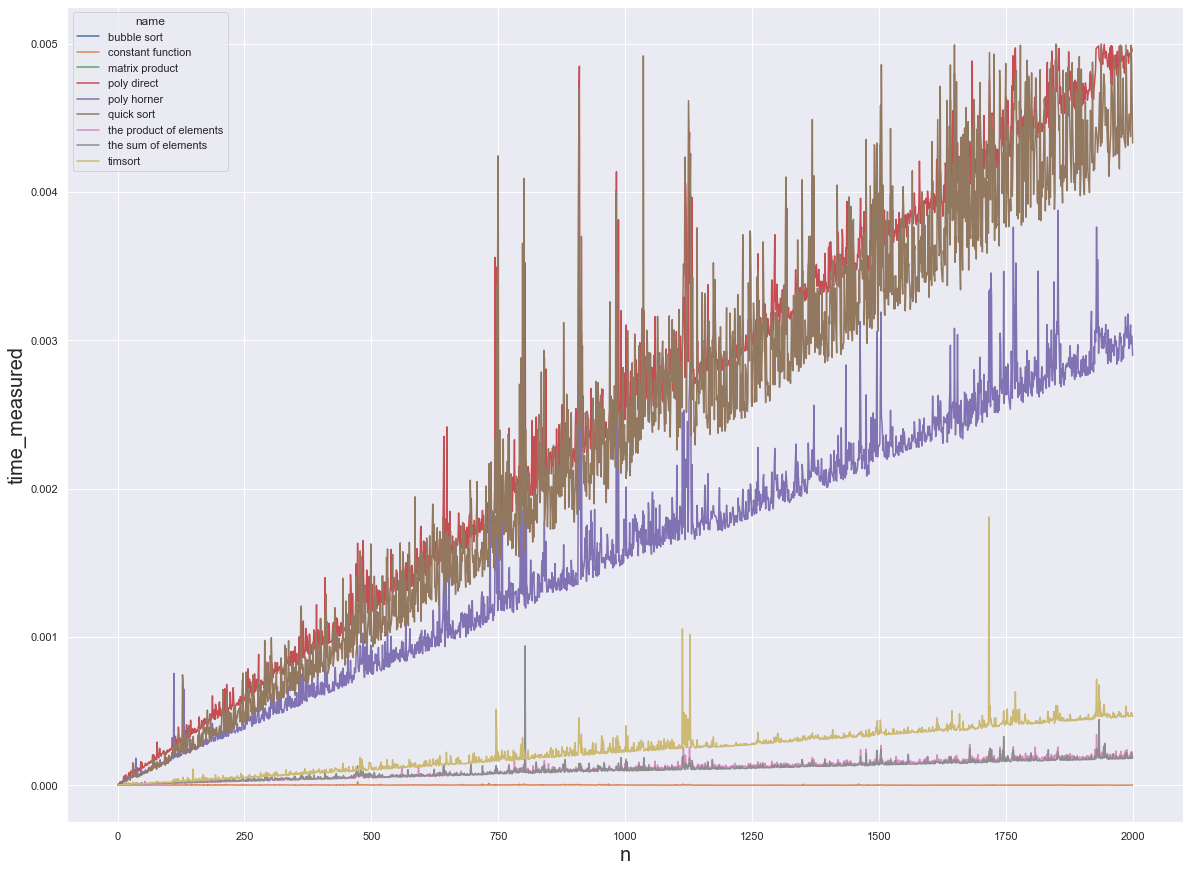

In [26]:
sns.lineplot(x="n",y="time_measured",hue="name",data=procesed_no_inf[
    ((procesed_no_inf.name!="matrix product")&(procesed_no_inf.name!="bubble sort")
    |(((procesed_no_inf.name=="matrix product")|(procesed_no_inf.name=="bubble sort"))&(procesed_no_inf.n==1)))
    &(procesed_no_inf.time_measured<0.005)])

In [14]:
procesed_no_inf["time_measured_log"]=np.log10(procesed_no_inf.time_measured)
procesed_no_inf

<ipython-input-14-0852afc76f83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procesed_no_inf["time_measured_log"]=np.log10(procesed_no_inf.time_measured)


,n,name,time_measured,time_predicted,time_measured_log
0,1,bubble sort,5.000000e-06,1.000000,-5.301030
1,1,constant function,6.599999e-07,1.000000,-6.180456
2,1,matrix product,1.524000e-05,1.000000,-4.817015
3,1,poly direct,8.500000e-06,1.000000,-5.070581
4,1,poly horner,4.540000e-06,1.000000,-5.342944
...,...,...,...,...,...
17995,2000,poly horner,2.898780e-03,2000.000000,-2.537785
17996,2000,quick sort,4.331520e-03,15201.804919,-2.363360
17997,2000,the product of elements,1.954600e-04,2000.000000,-3.708942
17998,2000,the sum of elements,1.823800e-04,2000.000000,-3.739023


A log time versus number n graph:

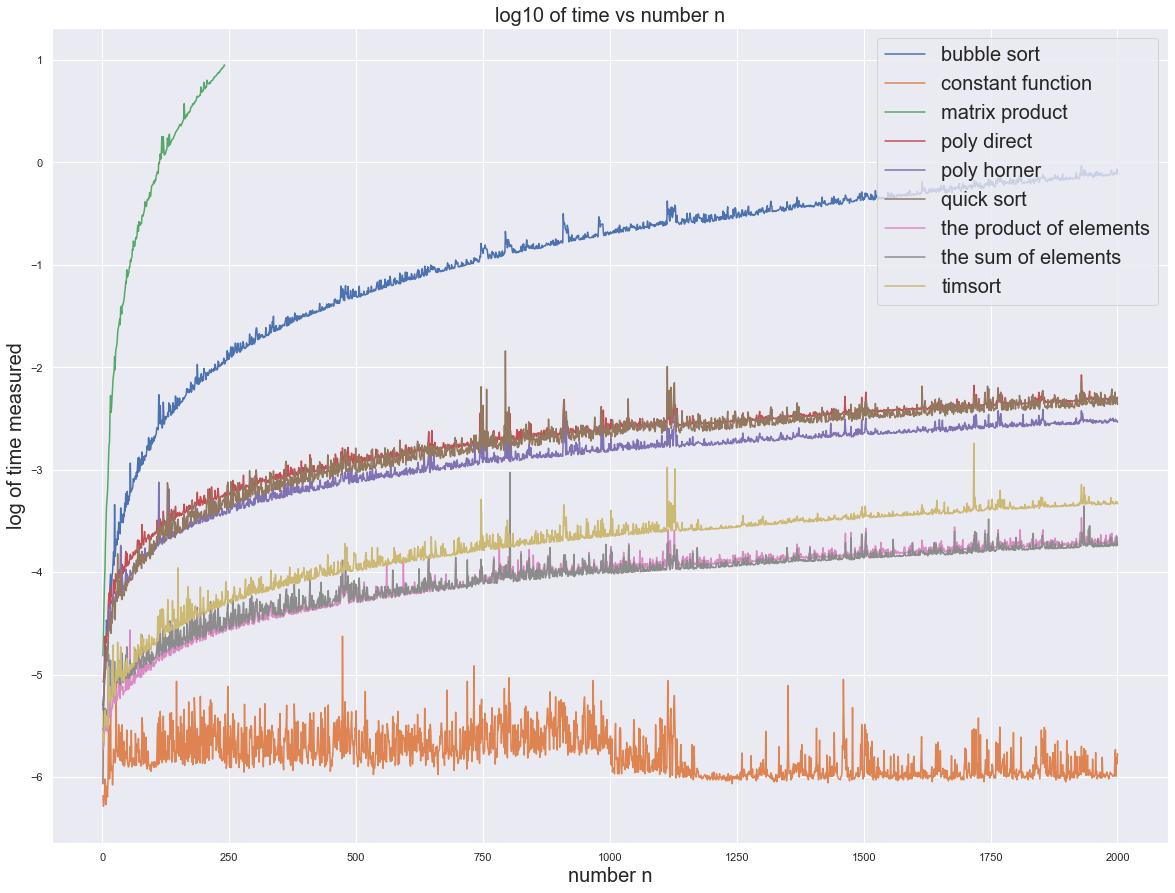

In [15]:
sns.lineplot(x="n",y="time_measured_log",hue="name",data=procesed_no_inf)\
    .set(xlabel='number n', ylabel='log of time measured',title="log10 of time vs number n")
plt.legend(loc="upper right",fontsize=20)

In [31]:
#procesed_no_inf.loc[:,["name","time_measured","time_measured_log"]].groupby("name",axis=0).describe()
procesed_no_inf.groupby("name",axis=0).aggregate({"time_measured":[min,max,np.mean],"time_measured_log":[min,max,np.mean]})

time_measured                     time_measured_log  \
                                  min       max      mean               min   
name                                                                          
bubble sort              5.000000e-06  0.930151  0.267720         -5.301030   
constant function        5.200000e-07  0.000024  0.000002         -6.283997   
matrix product           1.524000e-05  8.904200  2.271307         -4.817015   
poly direct              8.500000e-06  0.008417  0.002536         -5.070581   
poly horner              4.540000e-06  0.003877  0.001573         -5.342944   
quick sort               8.600000e-07  0.014425  0.002394         -6.065502   
the product of elements  1.840000e-06  0.000341  0.000108         -5.735182   
the sum of elements      2.840001e-06  0.000941  0.000104         -5.546682   
timsort                  2.180000e-06  0.001810  0.000239         -5.661543   

                                             
                              max      mean  
name                                         
bubble sort             -0.031447 -0.951497  
constant function       -4.624154 -5.790487  
matrix product           0.949595 -0.305411  
poly direct             -2.074841 -2.728268  
poly horner             -2.411480 -2.925114  
quick sort              -1.840876 -2.773186  
the product of elements -3.467806 -4.074321  
the sum of elements     -3.026540 -4.074842  
timsort                 -2.742369 -3.756876